In [1]:
import gym
import numpy as np
import gym_toytext
import tensorflow as tf
import rl.agents
import matplotlib.pyplot as plt

In [2]:
env= gym.make('Taxi-v3')

In [3]:
print(env.observation_space)
print(env.action_space)

Discrete(500)
Discrete(6)


In [4]:
env.reset()

273

In [5]:
for ep in range(1):
    state= env.reset()
    done= False
    Tr=0
    t=0
    while not done:
        env.render()
        state_, reward, done, info= env.step(np.random.randint(6))
        
        Tr+= reward
        print(t+1,state_, reward, done)
        t+=1
#     print(ep+1,":", Tr)

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

1 152 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
2 172 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
3 172 -10 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
4 72 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
5 52 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
6 52 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
7 72 -1 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
8 72 -10 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
9 72 -1 False
+---------+
|R: | : :G|
| : | : :

In [18]:
Q= np.zeros((500,6))
e= 0.9
gamma= 0.9
alpha=0.2
EP=10000
Tr_list=[]

for ep in range(EP):
    state= env.reset()
        
    P=[e/6]*6
    P[np.argmax(Q[state])]+=(1-e)
    action= np.random.choice([0,1,2,3,4,5],p=P)
    done= False
    TR=0
    
    while not done:
        next_state, reward, done, info= env.step(action)

        best_action= np.argmax(Q[next_state])
        
        
        
        
        
        Q[state][action]= Q[state][action]+ (alpha*(reward + (0.99*Q[next_state][best_action])- Q[state][action] ))
        
        
        P=[e/6]*6
        greedy_action= best_action
        P[greedy_action]+= (1-e)
        next_action= np.random.choice([0,1,2,3,4,5],p=P)
        

        state= next_state
        action= next_action
        
        TR+=reward
    
    Tr_list.append(TR)
    
    e= 0.05 + ((0.9-0.05)*np.exp(-0.01*ep) )
    print(ep, end='\r')

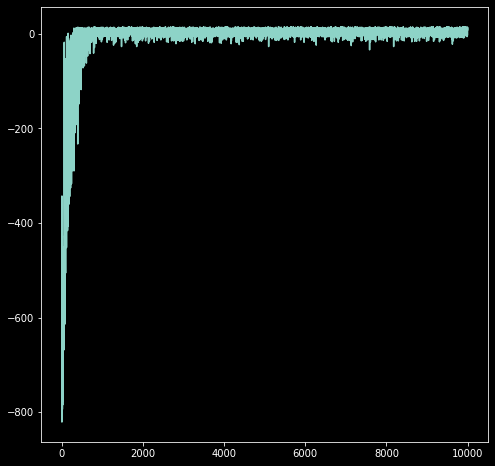

In [24]:
plt.figure(0, figsize=(8,8))
plt.style.use('dark_background')
plt.xticks(color='white')
plt.yticks(color='white')
plt.plot(Tr_list)

## Now we use these Q Values to reach the goal. Let's see our success rate.

In [21]:
success=np.zeros(500)
total_run=50

for runs in range(100):
    temp=np.zeros(500)

    for episodes in range(total_run):

        state= env.reset()
        action= np.argmax(Q[state])
        done= False
        Tr=0
        while not done:

            next_state, reward, done, info= env.step(action)

            action= np.argmax(Q[next_state])

            state= next_state

            Tr+=reward
            
        temp[episodes]=Tr
        
    success+=temp

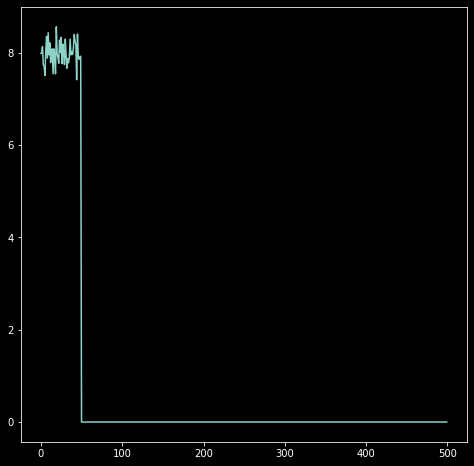

In [25]:
plt.figure(0, figsize=(8,8))
plt.style.use('dark_background')
plt.plot(success/100)